In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
#import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors





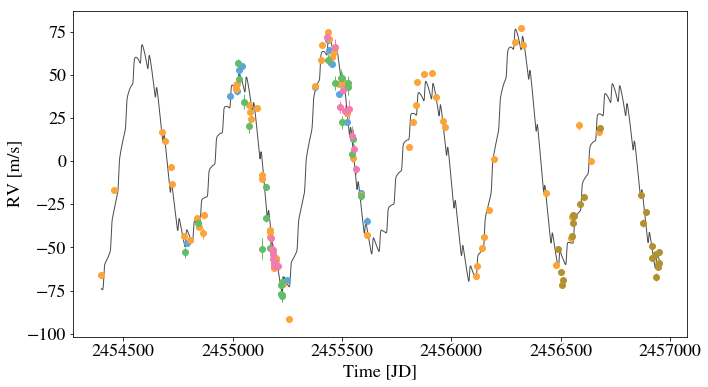

In [9]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

HD1502.add_planet(per = 430.59331289, mass = 2.957395 , M = 60.741140, e=0.041800, pomega = 136.847296)
HD1502.add_planet(per = 280.48642221, mass = 0.422739, M = 219.504367, e=0.1, pomega = 316.847280)
HD1502.add_planet(per = 776.09588310, mass = 0.495216, M = 122.807535, e=0.051500, pomega = 75.245985)
HD1502.add_planet(per = 33.91725679, mass = 0.100977, M = 249.084431, e=0.422158, pomega = 260.546413)
#last planet very small semimajor axis and very small mass


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
#HD1502.path_to_data = "/home/brett/musical-octo-goggles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

# t_0 = time.time()
# guess = [24.93338,2.03738,16.41142,-10.98964,38.91007]
# result = op.minimize(opt_offsets,guess)
# HD1502.offsets = result.x
# print "That took  %.3f seconds" %(time.time()-t_0)

# offsets = np.loadtxt('offsets_better')
offsets = [27.9308,3.1068,19.8646,-7.2437,43.2642]
HD1502.offsets = offsets

# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
#HD1502.path_to_data = "/home/brett/musical-octo-goggles/"

HD1502.plot_RV(epoch=epoch,pnts_per_period=1000)

In [3]:
def eval_1502(chromosome):
    mass0,mass1,mass2,mass3,e0,e1,e2,e3,per0,per1,per2,per3,M0,M1,M2,M3,pom0,pom1,pom2,pom3=chromosome
    HD1502.clear_planets()
    HD1502.add_planet(per = per0, mass = mass0 , M = M0, e=np.exp(e0), pomega = pom0)
    HD1502.add_planet(per = per1, mass = mass1, M = M1, e=np.exp(e1), pomega = pom1)
    HD1502.add_planet(per = per2, mass = mass2, M = M2, e=np.exp(e2), pomega = pom2)
    HD1502.add_planet(per = per3, mass = mass3, M = M3, e=np.exp(e3), pomega = pom3)
    x=-HD1502.stab_logprob(epoch=epoch,pnts_per_period=80)
    return x


In [5]:
bounds=[[2.5,3.1],[0.3,0.7],[0.3,0.65],[0.04,0.2],[np.log(0.02),np.log(0.2)],[np.log(0.02),np.log(0.2)],[np.log(0.02),np.log(0.3)],[np.log(0.1),np.log(0.5)],[300,600],[670,950],[220,330],[20,40],[20,120],[85,155],[180,260],[150,280],[80,170],[40,130],[265,355],[220,295]]
length=20

In [10]:
result=HD1502.genetic_search(bounds,length,eval_1502,num_gen=6000,crossover=0.7,mutation=0.3,pop_size=300,freq_stat=10,cores=0)


KeyboardInterrupt: 